### Real data example

Synthetics are not real ... here we provide a collection of timeseries from a well log. This kind of data is characterized by *fairly* abrupt changes to the physical rock properties sensed by the tools as they pass through different geologic formations. The challenge in this real world example is that there are no perfect hard edges in the series.

The data satyr_3_wire_ow.las is provided by Geoscience Australia and use under a CC-BY 4.0 license. Additional data associated with this well can be found on the [NOPIMS website](https://nopims.dmp.wa.gov.au/NOPIMS/Search/WellDetails?id=ENO0595344#).


In [4]:
import matplotlib.pylab as plt
import numpy as np
from skimage import measure

from blockhead.util import create_scale_space, default_synthetic, populate_interval_tree

from blockhead.visual import default_display

import lasio
from os import path

The lasio Python library is used to parse the well log, it returns and object with a collection of timeseries and the measured depth of the well. Use well_log.keys() to discover the available curves.

In [5]:
well_log = lasio.read(path.join("sample_data", "satyr_3_wire_ow.las"))
depth = well_log["DEPTH"]
gamma_ray = well_log["GR"]
# There are null values in the curves, remove these.
gamma_ray = gamma_ray[~np.isnan(gamma_ray)]

In [6]:
scale_space = create_scale_space(gamma_ray, min_scale=5, max_scale=2000, num_scales=100)

contours = measure.find_contours(scale_space["second"], 0)
interval_tree = populate_interval_tree(contours)

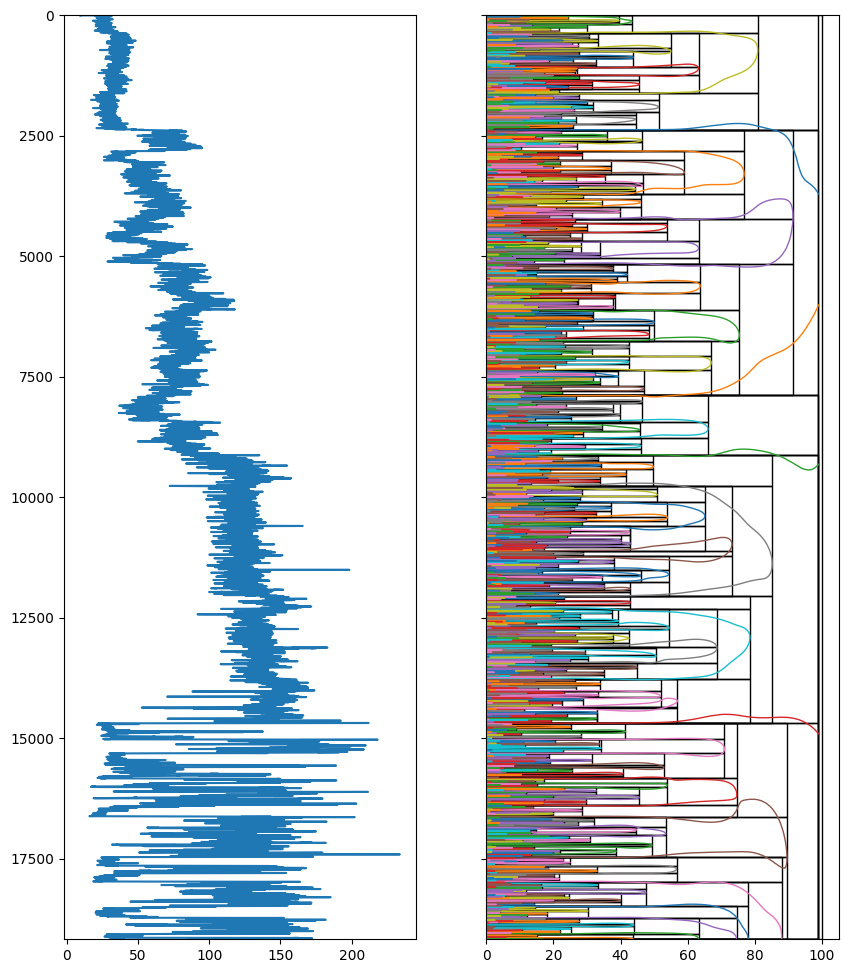

In [7]:
fig = default_display(gamma_ray, scale_space, interval_tree)

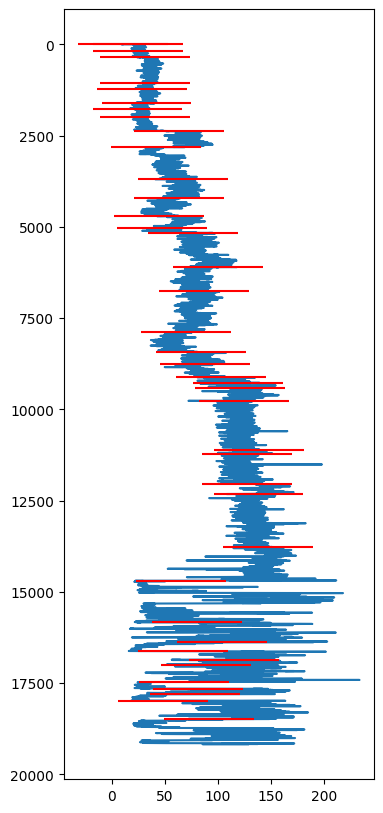

In [46]:
import matplotlib.pyplot as plt

from blockhead.util import slice_by_scale

#  set an arbitrary threshold, to define the scale to "block" the well at
threshold = 80
#  Compute a backus average Gamma-ray value over each interval
results = slice_by_scale(interval_tree["root"], threshold, gamma_ray, fn=min)

# Assuming gamma_ray and change_points are defined
change_points = [(i[0].get_data()["top"],) for i in results]

plt.figure(figsize=(4, 10))
plt.plot(gamma_ray, range(len(gamma_ray)))

# Add shorter horizontal lines at each change point
for point in change_points:
    plt.hlines(
        y=point[0],
        xmin=gamma_ray[np.int_(point)[0]] - np.std(gamma_ray),
        xmax=gamma_ray[np.int_(point)[0]] + np.std(gamma_ray),
        color="r",
        linestyle="-",
    )  # Adjust the line length with xmin and xmax

plt.gca().invert_yaxis()  # Invert y-axis if needed for depth plots
plt.show()